<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [5]:
dados = pd.read_csv('HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [6]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [7]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [8]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [11]:
dados.corr(numeric_only = True)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


Com a matriz de correalação podemos perceber que a variavel dependente Preço possui:

Correlação quase nula com Area

Correlação quase nula com Garagem

Correlação quase nula com banheiros

Correlação quase nula com lareira

Correlação positiva com marmore e andares

De acordo com o nivel de correlacao entre as variaveis com a dependente Preço , caracterizam-se como variáveis explicativas marmore e andares

As variávies explicativas possuem uma correlação praticamente nula, o que é ótimo para o modelo de Regressão Linear

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<Axes: >

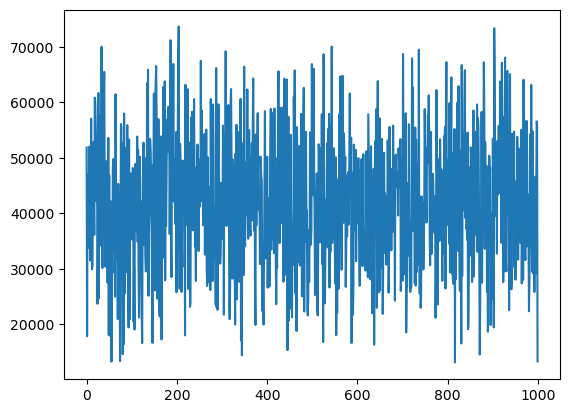

In [17]:
dados.precos.plot()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


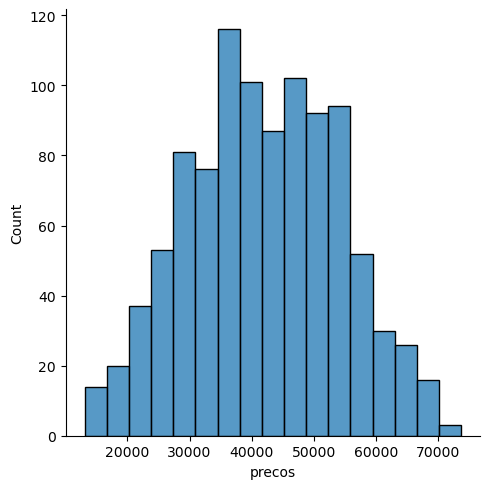

In [25]:
ax = sns.displot(dados.precos)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


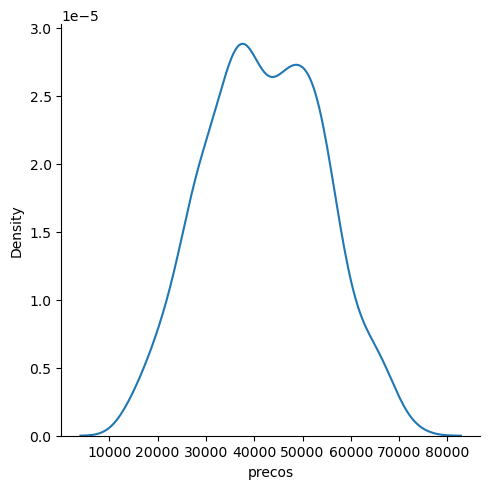

In [24]:
ax = sns.displot(dados.precos, kind = 'kde')

Através do histograma da variável dependente, conseguimos visualizar que ela se aproxima de uma Distribuição Normal, crucial para o funcionamento do modelo de Regressão

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

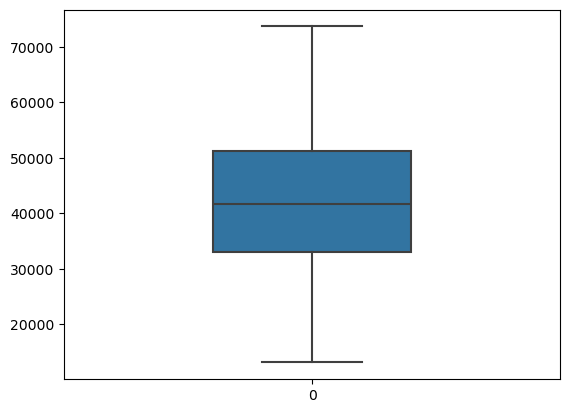

In [27]:
ax = sns.boxplot(data = dados.precos, width = 0.4,orient = 'v')

Através do boxplot da variável dependente, conseguimos analisar que os dados estão relativamente bem distribuídos, com a mediana praticamente no centro do boxplot, sem a presença de outliers

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

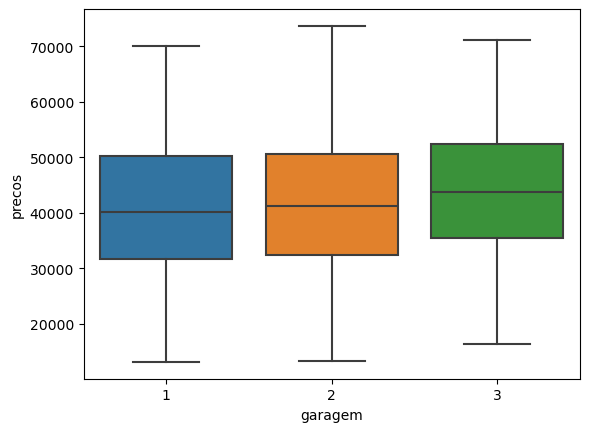

In [29]:
ax = sns.boxplot(x = 'garagem', y = 'precos', data = dados)

Com relação a garagem, a diferença entre 2 vagas e 1 vaga é pequena, com a mediana e os quartis muito proximos entre si. Agora, com 3 vagas, o boxplot coom um todo aumenta, possuindo uma mediana maior juntamente com os quartis.É notório comentar que não há a presença de outliers em nenhum caso

### Box-plot (Preço X Banheiros)

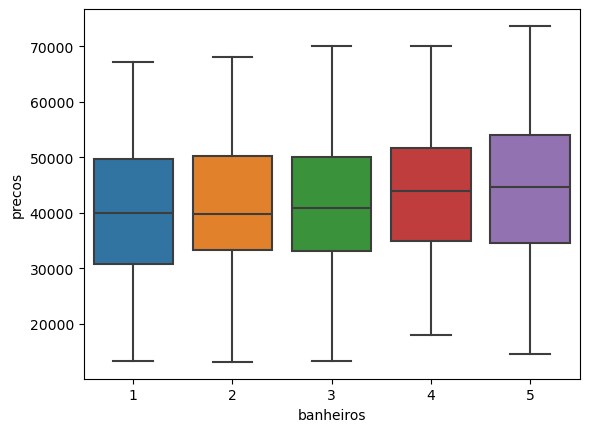

In [30]:
ax = sns.boxplot(x = 'banheiros', y = 'precos', data = dados)

Com relação aos banheiros, 1 a mediana está praticamente no centro do boxplot. Com 2, a mediana está mal distribuido, estandando muito proxima do primeiro quartil. Com 3, a mediana continua não centralizada porém melhor com relação a 2. Com 4, a mediana continua mal distribuido porém agora mais proxima do 3 quartil. Com 5, a mediana está quase centralizada. É notório comentar que não há outliers em nenhum caso

### Box-plot (Preço X Lareira)

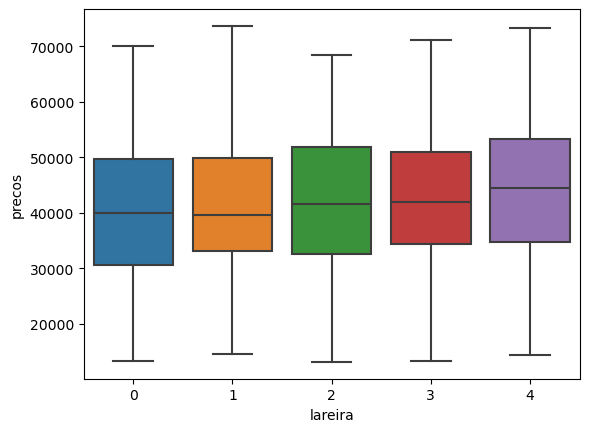

In [31]:
ax = sns.boxplot(x = 'lareira', y = 'precos', data = dados)

Com relação a lareira, com 0 a mediana está praticamente no centro do boxplot. Com 1, a mediana está mal distribuida, estando muito proxima do primeiro quartil. Com 2, a mediana continua não centralizada porém melhor com relação a 2. Com 4, a mediana está praticamente centralizada. Com 5, a mediana está mais proxima do terceiro quartil. É notório comentar que não há outliers em nenhum caso

### Box-plot (Preço X Acabamento em Mármore)

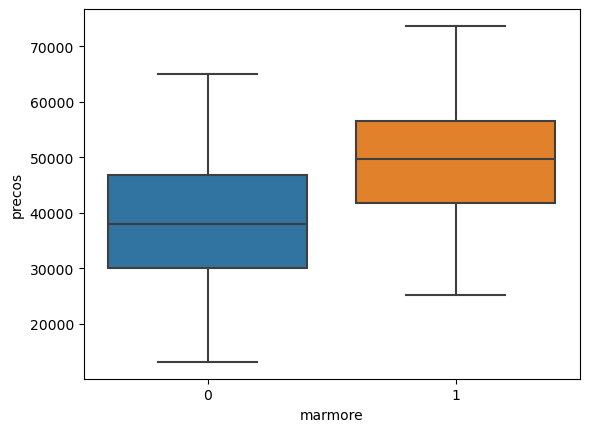

In [32]:
ax = sns.boxplot(x = 'marmore', y = 'precos', data = dados)

Com relação ao mármore, sem a presença de tal a mediana do boxplot está praticamente centralizada. Com a presença de tal a mediana está mais próxima do terceiro quartil. É notorio comentar que não há a presença de outliers

### Box-plot (Preço X Andares)

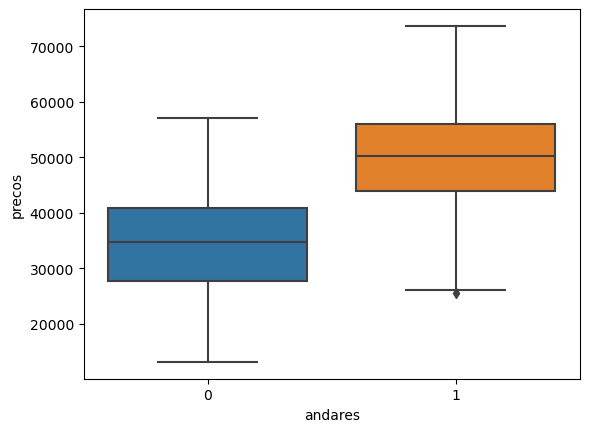

In [33]:
ax = sns.boxplot(x = 'andares', y = 'precos', data = dados)

Com relação a andares, sem a presença de mais de um andar a mediana está próxima do terceiro quartil. Com a presença de mais de um andar, a mediana está menos próxima do terceiro quartil, porém, não centralizada. É notório comentar que há a presença de outliers quando possuimos mais de um andar 

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

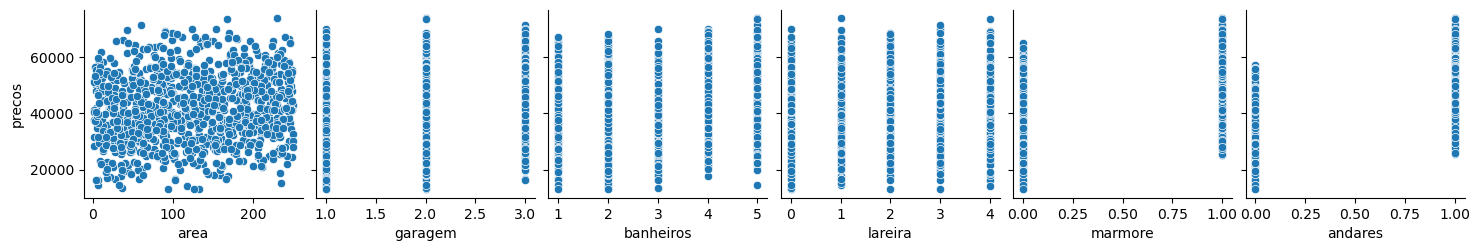

In [35]:
ax = sns.pairplot(dados, y_vars = ['precos'], x_vars = ['area',	'garagem','banheiros','lareira','marmore','andares'])

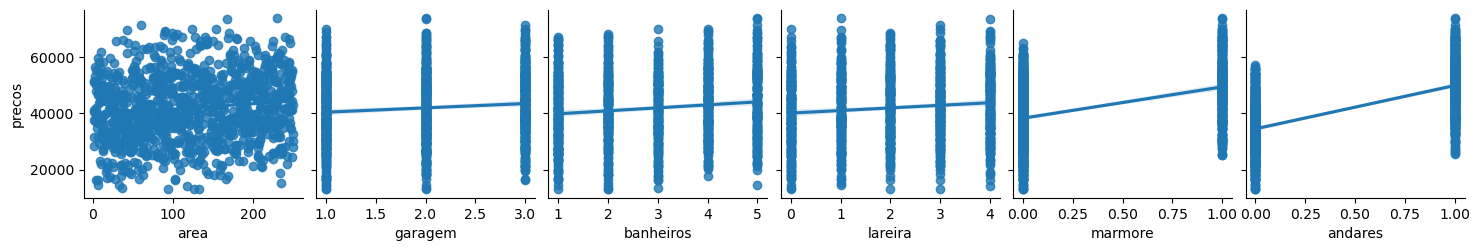

In [36]:
ax = sns.pairplot(dados, y_vars = ['precos'], x_vars = ['area',	'garagem','banheiros','lareira','marmore','andares'], kind = 'reg')

Com a análise gráfica podemos concluir que somente as variáveis explicativas Mármore e Andares possuem uma correlação forte com a variável dependente preços 

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [37]:
y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [51]:
X = dados[['marmore','andares']]

## Criando os datasets de treino e de teste

In [45]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [53]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [54]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [55]:
modelo.score(X_train, y_train)

0.5661577552667589

O modelo não representa um bom ajuste para explicar a variação da variavel dependente

Solução, alterarmos o conjunto das variáveis explicativas

In [56]:
X = dados[['lareira','marmore', 'andares']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2811)

In [59]:
modelo.fit(X_train, y_train)

LinearRegression()

In [60]:
modelo.score(X_train, y_train)

0.5735641826942643

O R^2 representa o quanto a variação da variavel dependente foi explicada pelas nossas variáveis independentes/explicativas

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [61]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [62]:
metrics.r2_score(y_test, y_previsto)

0.6473813366929986

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [75]:
lareira= 3
marmore= 0
andares= 0
entrada = [[lareira ,marmore, andares]]

In [76]:
modelo.predict(entrada)[0]

E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31757.879499902472

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo outras métricas para o modelo 

In [81]:
EQM = metrics.mean_squared_error(y_test, y_previsto)
EQM

53633578.6388287

In [82]:
REQM = np.sqrt(EQM)
REQM

7323.494974315795